<a href="https://colab.research.google.com/github/minotajordan/metaheuristic/blob/main/HC_HCRR_nD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

In [ ]:
# http://www.sfu.ca/~ssurjano/spheref.html
class sphere:
    def __init__(self, lb: float = -5.12, ub: float = 5.12):
        self.lower_bound = lb
        self.upper_bound = ub
        self.optimum = 0.0

    @staticmethod
    def evaluate(cells):
        # sphere = x[0]^2 + x[1]^2 + x[2]^2 + ... + x[n-1]^2
        summa = (np.power(cells,2)).sum()
        return summa

    def __str__(self):
        return "Sphere-lb:" + str(self.lower_bound) + '-up:' + str(self.upper_bound)

In [ ]:
class step:
    def __init__(self, lb: float = -5.12, ub: float = 5.12):
        self.lower_bound = lb
        self.upper_bound = ub
        self.optimum = 0.0

    @staticmethod
    def evaluate(cells):
        new_cells = np.floor(cells + 0.5)
        summa = (np.power(new_cells,2)).sum()
        return summa

    def __str__(self):
        return "Step-lb:" + str(self.lower_bound) + '-up:' + str(self.upper_bound)

In [ ]:
# https://goker.dev/iom/benchmarks/schwefel-1.2
class schwefel:
    def __init__(self, lb: float = -100, ub: float = 100):
        self.lower_bound = lb
        self.upper_bound = ub
        self.optimum = 0.0

    @staticmethod
    def evaluate(cells):
        summa = 0
        for i in range(len(cells) + 1):
            summa = summa + np.power(cells[:i].sum(), 2)
        return summa

    def __str__(self):
        return "Schwefel-1.2-lb:" + str(self.lower_bound) + '-up:' + str(self.upper_bound)


In [ ]:
# http://www.sfu.ca/~ssurjano/ackley.html
class ackley:
    def __init__(self, lb: float = -32.768, ub: float = 32.768):
        self.lower_bound = lb
        self.upper_bound = ub
        self.optimum = 0.0

    @staticmethod
    def evaluate(cells):
        a = 20
        b = 0.2
        c = 2 * np.pi
        d = len(cells)
        t1 = - a * math.exp( - b * math.sqrt((1 / d) * (np.power(cells, 2)).sum()))
        t2 = - math.exp((1 / d) * (np.cos(c * cells)).sum())
        return t1 + t2 + a + math.exp(1)

    def __str__(self):
        return "Ackley-lb:" + str(self.lower_bound) + '-up:' + str(self.upper_bound)

In [ ]:
# http://www.sfu.ca/~ssurjano/griewank.html
class griewank:
    def __init__(self, lb: float = -600, ub: float = 600):
        self.lower_bound = lb
        self.upper_bound = ub
        self.optimum = 0.0

    @staticmethod
    def evaluate(cells):
        i = np.arange(1, len(cells) + 1)
        t1 = (np.power(cells, 2)).sum() / 4000
        t2 = - np.prod(np.cos(cells / np.sqrt(i)))
        return t1 + t2 + 1

    def __str__(self):
        return "Griewank-lb:" + str(self.lower_bound) + '-up:' + str(self.upper_bound)

In [ ]:
# http://www.sfu.ca/~ssurjano/rastr.html
class rastrigin:
    def __init__(self, lb: float = -5.12, ub: float = 5.12):
        self.lower_bound = lb
        self.upper_bound = ub
        self.optimum = 0.0

    @staticmethod
    def evaluate(cells):
        d = len(cells)
        summa = 10 * d + (np.power(cells, 2) - 10 * np.cos(2 * np.pi * cells)).sum()
        return summa

    def __str__(self):
        return "Rastrigin-lb:" + str(self.lower_bound) + '-up:' + str(self.upper_bound)

In [ ]:
class solution:

    def __init__(self, d: int, f):
        self.size = d
        self.cells = np.zeros(self.size, float)
        self.fitness = 0.0
        self.function = f

    def from_solution(self, origin):
        self.size = origin.size
        self.cells = np.copy(origin.cells)
        self.fitness = origin.fitness
        self.function = origin.function

    def Initialization(self):
        self.cells = np.random.uniform(low=self.function.lower_bound, high=self.function.upper_bound,
                                       size=(self.size,))
        self.fitness = self.function.evaluate(self.cells)

    def tweak(self, bandwidth: float,iteration):
        bandwidth = bandwidth - 0.00001*iteration
        bandwidths = np.random.uniform(low=-bandwidth, high=bandwidth, size=(self.size,))
        self.cells = self.cells + bandwidths
        self.cells[self.cells < self.function.lower_bound] = self.function.lower_bound
        self.cells[self.cells > self.function.upper_bound] = self.function.upper_bound
        self.fitness = self.function.evaluate(self.cells)

    def __str__(self):
        return "cells:" + str(self.cells) + \
               "-fit:" + str(self.fitness)

In [ ]:
class HC:
    def __init__(self, max_efos: int, bandwidth: float):
        self.max_efos = max_efos
        self.bandwidth = bandwidth

    def evolve(self, seed: int, d: int, f):
        self.function = f
        np.random.seed (seed)
        best_fitness_history = np.zeros(self.max_efos, float)

        self.best = solution(d, f)
        self.best.Initialization()
        best_fitness_history[0] = self.best.fitness

        S = self.best # S is a pointer to self.best, not a full copy
        for iteration in range(1, self.max_efos):
            R = solution(S.size, S.function)
            R.from_solution(S) # R is a full copy of S
            R.tweak(self.bandwidth,iteration)
            if R.fitness < S.fitness:
                S.from_solution(R)
            best_fitness_history[iteration] = self.best.fitness
        return best_fitness_history

    def __str__(self):
        result = "HC:-bandwidth:" + str(self.bandwidth)
        return result

In [ ]:
# Plot convergence curve
def plot_convergence_curve(fitness_history, f, alg):
  efos = np.arange(len(fitness_history))
  plt.title("Convergence curve for " + str(f))
  plt.xlabel("EFOs")
  plt.ylabel("Fitness")
  plt.plot(efos, fitness_history, label=str(alg))
  plt.legend()
  plt.show()
  plt.savefig("Convergence curve for " + str(f) + "" + str(alg) + ".png")

# Plot convergence curve comparison for two or more algorithms
def plot_convergence_curve_comparison(fitness_history, f, alg):
  efos = np.arange(len(fitness_history[0]))
  plt.title("Convergence curve for " + str(f))
  plt.xlabel("EFOs")
  plt.ylabel("Fitness")
  algorithms = len(fitness_history)
  for a in range(algorithms):
    plt.plot(efos, fitness_history[a], label=str(alg[a]))
  plt.legend()
  plt.show()
  plt.savefig("Convergence curve for " + str(f) + "" + str(alg) + ".png")

def print_alorithms_with_avg_fitness(alg, avg_fitness):
  rows = len(alg)
  for r in range(rows):
    print(alg[r] + " {0:12.6f}".format(avg_fitness[r]))

In [ ]:
class HCRR:
    def __init__(self, max_efos: int, max_local: int, bandwidth: float):
        self.max_efos = max_efos
        self.max_local = max_local
        self.bandwidth = bandwidth

    def evolve(self, seed: int, d: int, f):
        self.function = f
        np.random.seed (seed)
        best_fitness_history = np.zeros(self.max_efos, float)
        efos = 0
        while efos < self.max_efos:
          S = solution(d, f) # S is a new Solution
          S.Initialization() # Random initialization and calculating fitness
          if efos == 0:
            self.best = solution(d, f)
            self.best.from_solution(S) # self.best is a full copy of S
          else:
            if S.fitness < self.best.fitness:
              self.best.from_solution(S) # self.best is a full copy of S
          best_fitness_history[efos] = self.best.fitness
          efos +=1
          # Perform the hill climbig optimization (local)
          for opt in range(1, self.max_local):
              R = solution(S.size, S.function)
              R.from_solution(S) # R is a full copy of S
              R.tweak(self.bandwidth,efos) # Tweeking and calculating fitness
              if R.fitness < S.fitness:
                  S.from_solution(R)
              if S.fitness < self.best.fitness:
                  self.best.from_solution(S) # self.best is a full copy of S
              best_fitness_history[efos] = self.best.fitness
              efos+=1
              if efos >= self.max_efos:
                break
        return best_fitness_history

    def __str__(self):
        result = "HCRR:-bandwidth:" + str(self.bandwidth)
        result += "-maxlocal:" + str(self.max_local)
        return result

In [ ]:
class SA:
    def __init__(self, max_efos: int, bandwidth: float):
        self.max_efos = max_efos
        self.bandwidth = bandwidth

    def evolve(self, seed: int, d: int, f):
        to = 100
        self.function = f
        np.random.seed (seed)
        best_fitness_history = np.zeros(self.max_efos, float)

        S = solution(d, f) # S is a new Solution
        S.Initialization()
        best_fitness_history[0] = S.fitness
        self.best = solution(d, f)
        self.best.from_solution(S) # self.best is a full copy of S
        t= to
        for iteration in range(1, self.max_efos):
            R = solution(S.size, S.function)
            R.from_solution(S) # R is a full copy of S
            R.tweak(self.bandwidth,iteration)
            t = t - to/(self.max_efos + 1)
            ale = np.random.uniform()
            prob = np.exp((S.fitness - R.fitness) / t) # Minimizing
            if R.fitness < S.fitness or ale < prob: # Minimizing
                S.from_solution(R)
            if S.fitness < self.best.fitness: # Minimizing
                self.best.from_solution(S)
            best_fitness_history[iteration] = self.best.fitness
        return best_fitness_history

    def __str__(self):
        result = "SA:-bandwidth:" + str(self.bandwidth)
        return result


Sphere-lb:-5.12-up:5.12 HC:-bandwidth:0.1
avg_best: 8.192880670181772e-05
Tiempo de un algoritmo
34.81195640563965

Sphere-lb:-5.12-up:5.12 HCRR:-bandwidth:0.1-maxlocal:100
avg_best: 133.08236899309327
Tiempo de un algoritmo
37.37513041496277

Sphere-lb:-5.12-up:5.12 SA:-bandwidth:0.1
avg_best: 9.614344356626054
Tiempo de un algoritmo
44.76771378517151


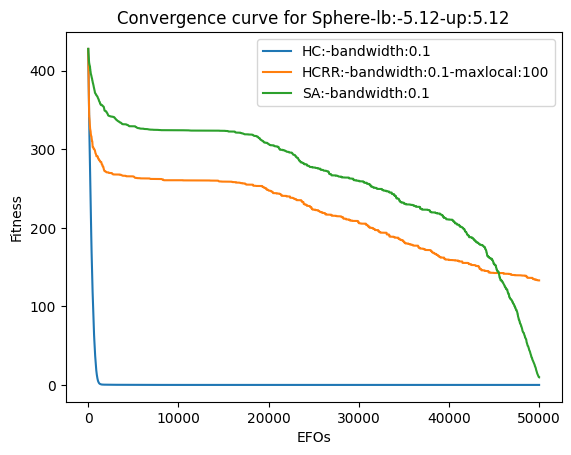


Step-lb:-5.12-up:5.12 HC:-bandwidth:0.1
avg_best: 82.03225806451613
Tiempo de un algoritmo
38.10214376449585

Step-lb:-5.12-up:5.12 HCRR:-bandwidth:0.1-maxlocal:100
avg_best: 226.4516129032258
Tiempo de un algoritmo
39.45853638648987

Step-lb:-5.12-up:5.12 SA:-bandwidth:0.1
avg_best: 31.096774193548388
Tiempo de un algoritmo
48.982033491134644


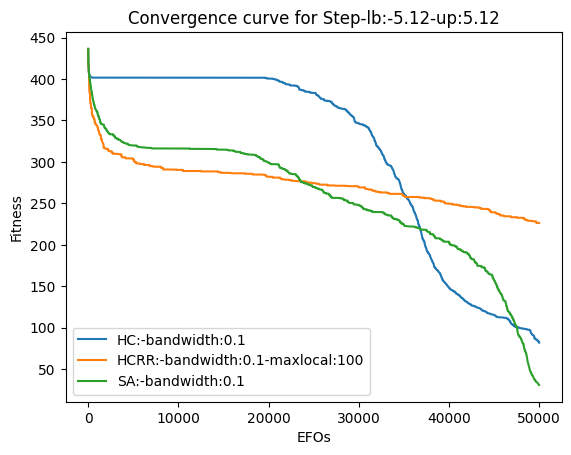


Ackley-lb:-32.768-up:32.768 HC:-bandwidth:0.1
avg_best: 19.52496998919638
Tiempo de un algoritmo
48.228607416152954

Ackley-lb:-32.768-up:32.768 HCRR:-bandwidth:0.1-maxlocal:100
avg_best: 20.030112523613166
Tiempo de un algoritmo
48.52651572227478

Ackley-lb:-32.768-up:32.768 SA:-bandwidth:0.1
avg_best: 20.60156195580084
Tiempo de un algoritmo
56.52469849586487


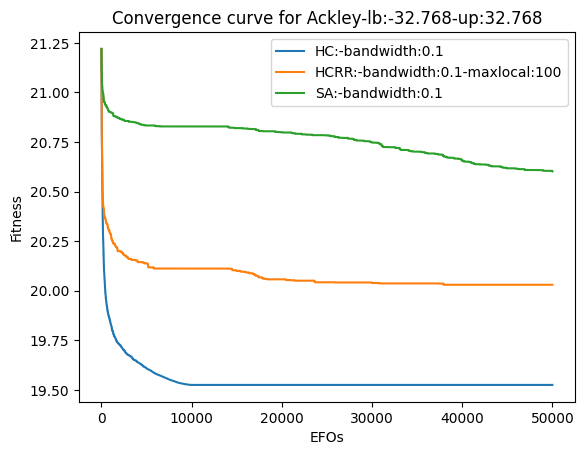


Griewank-lb:-600-up:600 HC:-bandwidth:0.1
avg_best: 61.67296432338869
Tiempo de un algoritmo
59.773666858673096

Griewank-lb:-600-up:600 HCRR:-bandwidth:0.1-maxlocal:100
avg_best: 978.815761395002
Tiempo de un algoritmo
60.11286807060242

Griewank-lb:-600-up:600 SA:-bandwidth:0.1
avg_best: 1383.1383806677998
Tiempo de un algoritmo
71.93647360801697


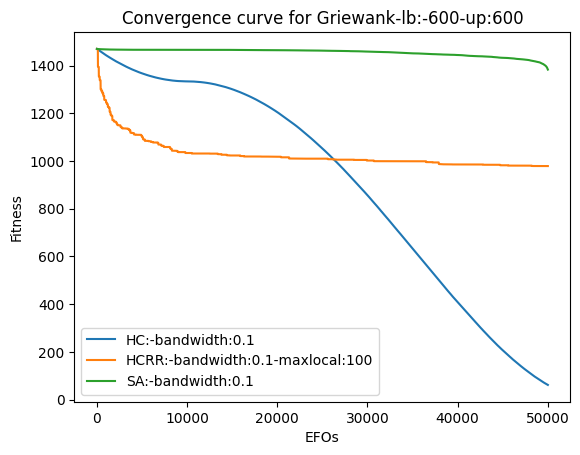


Rastrigin-lb:-5.12-up:5.12 HC:-bandwidth:0.1
avg_best: 425.75965962134325
Tiempo de un algoritmo
47.44901967048645

Rastrigin-lb:-5.12-up:5.12 HCRR:-bandwidth:0.1-maxlocal:100
avg_best: 503.2330421378702
Tiempo de un algoritmo
48.98686170578003

Rastrigin-lb:-5.12-up:5.12 SA:-bandwidth:0.1
avg_best: 511.0979070682922
Tiempo de un algoritmo
56.43359017372131


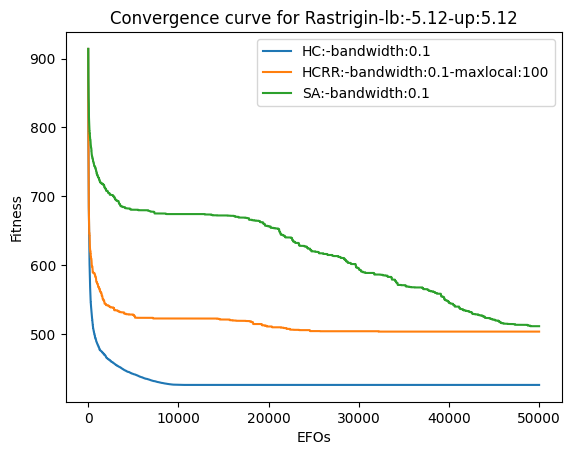

<Figure size 640x480 with 0 Axes>

In [ ]:
d = 50
max_efos = 50000
repetitions = 31

# Afinamiento de parametros
bw = 0.1
max_local = 100

#functions = [sphere(), step(), schwefel(), ackley(), griewank(), rastrigin()]
functions = [sphere(), step(), ackley(), griewank(), rastrigin()]

hc = HC(max_efos = max_efos, bandwidth = bw)
hcrr = HCRR(max_efos= max_efos, max_local = max_local, bandwidth = bw)
sa = SA(max_efos = max_efos, bandwidth = bw)
algorithms = [hc, hcrr, sa]

df = pd.DataFrame({'Problem': pd.Series(dtype='str'),
                   'Average Fitness': pd.Series(dtype='float'),
                   'Standard Deviation': pd.Series(dtype='float'),
                   'Best Fitness': pd.Series(dtype='float'),
                   'Worst Fitness': pd.Series(dtype='float'),
                   'Execution Time': pd.Series(dtype='float')})
df2 = pd.DataFrame({'Problem': pd.Series(dtype='str'),
                   'Average Fitness': pd.Series(dtype='float'),
                   'Standard Deviation': pd.Series(dtype='float'),
                   'Best Fitness': pd.Series(dtype='float'),
                   'Worst Fitness': pd.Series(dtype='float'),
                   'Execution Time': pd.Series(dtype='float')})
df3 = pd.DataFrame({'Problem': pd.Series(dtype='str'),
                   'Average Fitness': pd.Series(dtype='float'),
                   'Standard Deviation': pd.Series(dtype='float'),
                   'Best Fitness': pd.Series(dtype='float'),
                   'Worst Fitness': pd.Series(dtype='float'),
                   'Execution Time': pd.Series(dtype='float')})
df4 = pd.DataFrame({'Problem': pd.Series(dtype='str'),
                   'Average Fitness': pd.Series(dtype='float'),
                   'Standard Deviation': pd.Series(dtype='float'),
                   'Best Fitness': pd.Series(dtype='float'),
                   'Worst Fitness': pd.Series(dtype='float'),
                   'Execution Time': pd.Series(dtype='float')})
for f in functions:

  names_alg = []
  avg_curve_alg = []
  best_avg_fitness_alg = []
  best_std_fitness_alg = []
  best_fitness_along_seeds = []
  worst_fitness_along_seeds = []
  alg_time = []

  for alg in algorithms:
    print(f"\n{f} {alg}")
    avg_curve = np.zeros(max_efos, float)
    best_fitnes = np.zeros(repetitions, float)
    time_by_repetition = 0

    for s in range(0, repetitions):
      start_timer = time.time()
      curve_data = alg.evolve(seed=s, d=d, f=f)
      end_timer = time.time()
      time_spend = end_timer - start_timer
      avg_curve = avg_curve + curve_data
      time_by_repetition = time_by_repetition + time_spend
      best_fitnes[s] = alg.best.fitness
      #print(s, best_fitnes[s])

    avg_curve = avg_curve/ repetitions
    avg_best_fitnes = np.average(best_fitnes)
    print(f"avg_best: {avg_best_fitnes}")
    std_best_fitnes = np.std(best_fitnes)

    names_alg.append(str(alg))
    avg_curve_alg.append(avg_curve)
    best_avg_fitness_alg.append(avg_best_fitnes)
    best_std_fitness_alg.append(std_best_fitnes)
    best_fitness_along_seeds.append(min(best_fitnes))
    worst_fitness_along_seeds.append(max(best_fitnes))
    alg_time.append(time_by_repetition)
    print("Tiempo de un algoritmo")
    print(time_by_repetition)

  plot_convergence_curve_comparison(avg_curve_alg, f, names_alg)

  new_row = pd.DataFrame({'Problem': str(f),
                           'Average Fitness':str(best_avg_fitness_alg[0]),
                           'Standard Deviation':str(best_std_fitness_alg[0]),
                           'Best Fitness':str(best_fitness_along_seeds[0]),
                           'Worst Fitness':str(worst_fitness_along_seeds[0]),
                           'Execution Time':str(alg_time[0])}, index=[0])
  df = pd.concat([df.loc[:], new_row]).reset_index(drop=True)

  new_row2 = pd.DataFrame({'Problem': str(f),
                           'Average Fitness':str(best_avg_fitness_alg[1]),
                           'Standard Deviation':str(best_std_fitness_alg[1]),
                           'Best Fitness':str(best_fitness_along_seeds[1]),
                           'Worst Fitness':str(worst_fitness_along_seeds[1]),
                           'Execution Time':str(alg_time[1])}, index=[0])
  df2 = pd.concat([df2.loc[:], new_row2]).reset_index(drop=True)

  new_row3 = pd.DataFrame({'Problem': str(f),
                           'Average Fitness':str(best_avg_fitness_alg[2]),
                           'Standard Deviation':str(best_std_fitness_alg[2]),
                           'Best Fitness':str(best_fitness_along_seeds[2]),
                           'Worst Fitness':str(worst_fitness_along_seeds[2]),
                           'Execution Time':str(alg_time[2])}, index=[0])
  df3 = pd.concat([df3.loc[:], new_row3]).reset_index(drop=True)

#  new_row4 = pd.DataFrame({'Problem': str(f),
#                           'Average Fitness':str(best_avg_fitness_alg[3]),
#                           'Standard Deviation':str(best_std_fitness_alg[3]),
#                           'Best Fitness':str(best_fitness_along_seeds[3]),
#                           'Worst Fitness':str(worst_fitness_along_seeds[3]),
#                           'Execution Time':str(alg_time[3])}, index=[0])
#  df4 = pd.concat([df4.loc[:], new_row4]).reset_index(drop=True)

In [ ]:
df

In [ ]:
df2

In [ ]:
df3

In [ ]:
df.to_csv("HC.csv", index=False)
df2.to_csv("HCRR.csv", index=False)
df3.to_csv("SA.csv", index=False)
df4.to_csv("Compilado.csv", index=False)

In [ ]:
start_timer = time.time()
start_timer

In [ ]:
start_timer = time.time()
time.sleep(2.4)
end_timer = time.time()
time_spend = end_timer - start_timer
time_spend